# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime
import geopandas as gpd
import geoplot
from shapely.geometry import Point

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

pd.DataFrame(cities).to_csv(output_data_file,header=False,index=False)
        
# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities = pd.read_csv(output_data_file, header=None)[0].tolist()

In [4]:
units= "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
count = 1
set_count = 1
process_log = []
weather = []
city_list = []
cloudiness = []
country = []
date = []
humidity = []
lats = []
lngs = []
max_temp = []
wind_speed = []

for city in cities:
    if count == 51:
        time.sleep(1)
        count = 1
        set_count += 1

    query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + units
    response = requests.get(query_url)
    response_data = response.json()
    try:
        city_list.append(response_data["name"])
        cloudiness.append(response_data["clouds"]["all"])
        country.append(response_data["sys"]["country"])
        date.append(response_data["dt"])
        humidity.append(response_data["main"]["humidity"])
        lats.append(response_data["coord"]["lat"])
        lngs.append(response_data["coord"]["lon"])
        max_temp.append(response_data["main"]["temp_max"])
        wind_speed.append(response_data["wind"]["speed"])
        process_log.append(f"Processing Record {count} of Set {set_count} | {city}")
        print(process_log[-1])
        count += 1
    except:
        process_log.append(f"City not found. Skipping...")
        print(process_log[-1])
        
process_log.append("-----------------------------")
process_log.append("Data Retrieval Complete")
process_log.append("-----------------------------")

print(process_log[-3])
print(process_log[-2])
print(process_log[-1])

pd.DataFrame(process_log).to_csv("output_data/WeatherPy_process_log.txt",header=False, index=False)

Processing Record 1 of Set 1 | hilo
City not found. Skipping...
Processing Record 2 of Set 1 | narok
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | hobart
City not found. Skipping...
Processing Record 7 of Set 1 | bathsheba
Processing Record 8 of Set 1 | souillac
Processing Record 9 of Set 1 | karratha
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | yulara
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | oksfjord
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | bima
Processing Record 23 of Set 1 | deputatskiy
Processing Record

Processing Record 35 of Set 4 | miles city
Processing Record 36 of Set 4 | pucallpa
Processing Record 37 of Set 4 | shahreza
City not found. Skipping...
Processing Record 38 of Set 4 | kamenka
Processing Record 39 of Set 4 | esil
Processing Record 40 of Set 4 | sampit
Processing Record 41 of Set 4 | boo
Processing Record 42 of Set 4 | watsa
Processing Record 43 of Set 4 | saint-francois
Processing Record 44 of Set 4 | victoria
Processing Record 45 of Set 4 | nikolo-pavlovskoye
Processing Record 46 of Set 4 | sainte-rose
Processing Record 47 of Set 4 | nikolskoye
Processing Record 48 of Set 4 | pudozh
Processing Record 49 of Set 4 | amarpatan
Processing Record 50 of Set 4 | gornopravdinsk
City not found. Skipping...
Processing Record 1 of Set 5 | nishihara
City not found. Skipping...
City not found. Skipping...
Processing Record 2 of Set 5 | upernavik
City not found. Skipping...
Processing Record 3 of Set 5 | pangnirtung
Processing Record 4 of Set 5 | vallenar
City not found. Skipping..

Processing Record 19 of Set 8 | kungurtug
Processing Record 20 of Set 8 | marsaxlokk
Processing Record 21 of Set 8 | liyang
Processing Record 22 of Set 8 | ongandjera
Processing Record 23 of Set 8 | andapa
Processing Record 24 of Set 8 | longyan
Processing Record 25 of Set 8 | loandjili
Processing Record 26 of Set 8 | waddan
Processing Record 27 of Set 8 | greenville
Processing Record 28 of Set 8 | candido de abreu
Processing Record 29 of Set 8 | huilong
Processing Record 30 of Set 8 | capreol
Processing Record 31 of Set 8 | chandauli
City not found. Skipping...
Processing Record 32 of Set 8 | constitucion
Processing Record 33 of Set 8 | barguzin
Processing Record 34 of Set 8 | provideniya
Processing Record 35 of Set 8 | jardim
Processing Record 36 of Set 8 | biak
Processing Record 37 of Set 8 | hofn
Processing Record 38 of Set 8 | volzhskiy
City not found. Skipping...
City not found. Skipping...
Processing Record 39 of Set 8 | egvekinot
City not found. Skipping...
Processing Record 40

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df = pd.DataFrame({
    "City": city_list,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
})

df.to_csv("output_data/Weather_Data.csv", header=True, index=False)
df.count()

City          533
Cloudiness    533
Country       533
Date          533
Humidity      533
Lat           533
Lng           533
Max Temp      533
Wind Speed    533
dtype: int64

In [6]:
# datetime.utcfromtimestamp(df['Date'][0]).strftime('%m/%d/%Y')
df["Date"] = df.Date.apply(lambda d: datetime.strftime(datetime.utcfromtimestamp(d), "%m/%d/%Y"))
df["Date"].unique()
date = df["Date"].unique()[0]

df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,1,US,10/17/2019,51,19.71,-155.08,86.00,6.93
1,Narok,72,KE,10/17/2019,85,-1.09,35.87,54.46,3.93
2,Busselton,27,AU,10/17/2019,83,-33.64,115.35,57.99,3.00
3,Rikitea,100,PF,10/17/2019,79,-23.12,-134.97,73.94,3.78
4,Punta Arenas,2,CL,10/17/2019,87,-53.16,-70.91,46.00,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

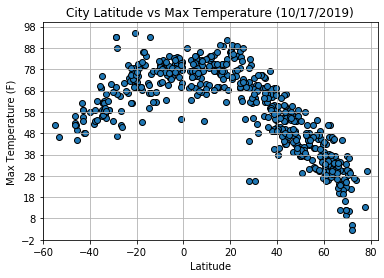

In [7]:
plt.scatter(df["Lat"],df["Max Temp"], facecolor="tab:blue", edgecolor="k")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.xticks(np.arange(round(min(df["Lat"])-5,0),round(max(df["Lat"])+5,0),20))
plt.yticks(np.arange(min(0,round(min(df["Max Temp"])-5,0)),max(100,round(max(df["Max Temp"])+5,0)),10))
plt.xlim(round(min(df["Lat"])-5,0),round(max(df["Lat"])+5,0))
plt.ylim(min(0,round(min(df["Max Temp"])-5,0)),max(100,round(max(df["Max Temp"])+5,0)))
plt.savefig("output_data/max_temp.png")

#### Latitude vs. Humidity Plot

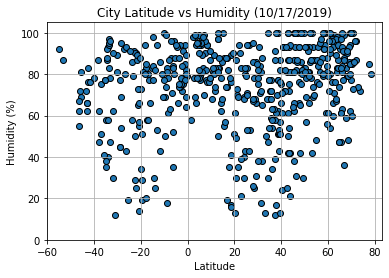

In [8]:
plt.scatter(df["Lat"],df["Humidity"], facecolor="tab:blue", edgecolor="k")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({date})")
plt.xticks(np.arange(round(min(df["Lat"])-5,0),round(max(df["Lat"])+5,0),20))
plt.yticks(np.arange(0,120,20))
plt.xlim(round(min(df["Lat"])-5,0),round(max(df["Lat"])+5,0))
plt.ylim(0,105)
plt.savefig("output_data/huminity.png")

#### Latitude vs. Cloudiness Plot

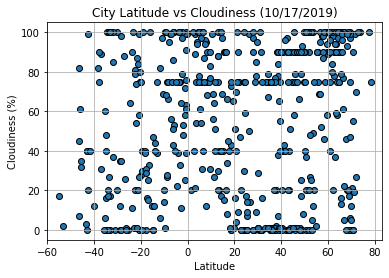

In [9]:
plt.scatter(df["Lat"],df["Cloudiness"], facecolor="tab:blue", edgecolor="k")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.xticks(np.arange(round(min(df["Lat"])-5,0),round(max(df["Lat"])+5,0),20))
plt.yticks(np.arange(0,110,20))
plt.xlim(round(min(df["Lat"])-5,0),round(max(df["Lat"])+5,0))
plt.ylim(-5,105)
plt.savefig("output_data/cloudiness.png")

#### Latitude vs. Wind Speed Plot

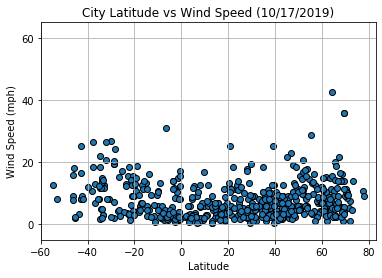

In [10]:
plt.scatter(df["Lat"],df["Wind Speed"], facecolor="tab:blue", edgecolor="k")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.xticks(np.arange(round(min(df["Lat"])-5,0),round(max(df["Lat"])+5,0),20))
plt.yticks(np.arange(0,70,20))
plt.xlim(round(min(df["Lat"])-5,0),round(max(df["Lat"])+5,0))
plt.ylim(-5,65)
plt.savefig("output_data/wind_speed.png")

## Obersevations
1. There is a correlation between latitude and temperature, with hotter temperatures near the equator.
2. There does not seem to be a correlation between latitude and humidity, cloudiness, or wind speed.
3. Humidity is more frequently higher than 50% than lower than 50%.

In [11]:
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)


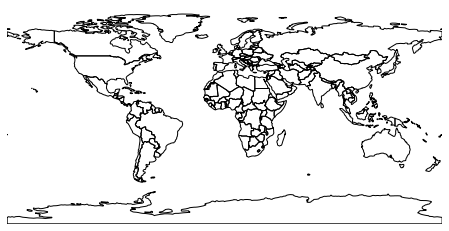

In [12]:
geoplot.polyplot(world, figsize=(8, 4))

In [13]:
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(df['Lng'], df["Lat"])]
geometry[:3]

In [14]:
geo_df = gpd.GeoDataFrame(df,
                         crs = crs,
                         geometry = geometry)
geo_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,geometry
0,Hilo,1,US,10/17/2019,51,19.71,-155.08,86.00,6.93,POINT (-155.08 19.71)
1,Narok,72,KE,10/17/2019,85,-1.09,35.87,54.46,3.93,POINT (35.87 -1.09)
2,Busselton,27,AU,10/17/2019,83,-33.64,115.35,57.99,3.00,POINT (115.35 -33.64)
3,Rikitea,100,PF,10/17/2019,79,-23.12,-134.97,73.94,3.78,POINT (-134.97 -23.12)
4,Punta Arenas,2,CL,10/17/2019,87,-53.16,-70.91,46.00,8.05,POINT (-70.91 -53.16)


Text(0.5, 320.458110514301, '')

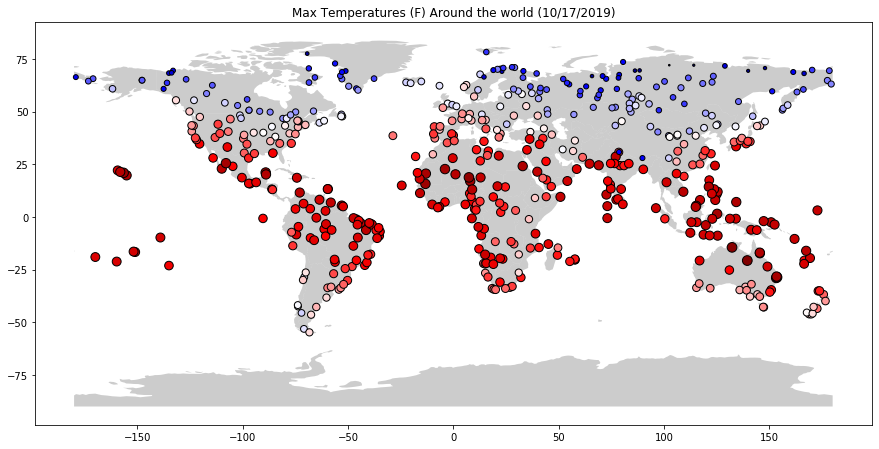

In [15]:
fig, ax = plt.subplots(figsize=(15,15))
world.plot(ax=ax, alpha=0.4, color="grey")
geo_df.plot(ax=ax, markersize="Max Temp", column=geo_df["Max Temp"], cmap="seismic", edgecolor='k')
plt.title(f"Max Temperatures (F) Around the world ({date})")
plt.xlabel("")